## **Text data Analysis**

We have performed EDA on imdb review text data which has 50,000 reviews.

**Task is to analyze text data using graphs**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Analyzing data
 - Pie chart of sentiment 
 - Bar graph of sentiment
 - Lenth distribution visualization
 - Frequency of words Distribution
 - Most common Words using Wordcloud
 - Frequency of word wrt sentiment
- Conclusion

## **Importing required Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import nltk
from nltk.corpus import stopwords

## **Uploading Dataset**

In [0]:
data = pd.read_csv('/content/IMDB Dataset.csv')

## **Analyzing Data**

In [3]:
#Display the top 5 rows and column
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Describe the data using describe method       
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [0]:
# Converting sentiment to integer as 0 for negative and 1 for positive
label_encoder = preprocessing.LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

In [6]:
# Checking if changes are done 
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Pie chart of sentiment**

Plotting the pie chart of sentiment distribution

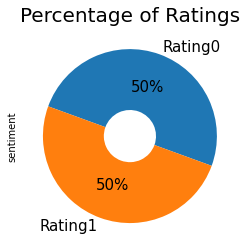

In [7]:
# Plot Pie chart of sentiment column 

plt.title('Percentage of Ratings', fontsize=20)
data.sentiment.value_counts().plot(kind='pie', labels=[ 'Rating0', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

**Bar graph of sentiment**

Plotting the bar graph of sentiment distribution

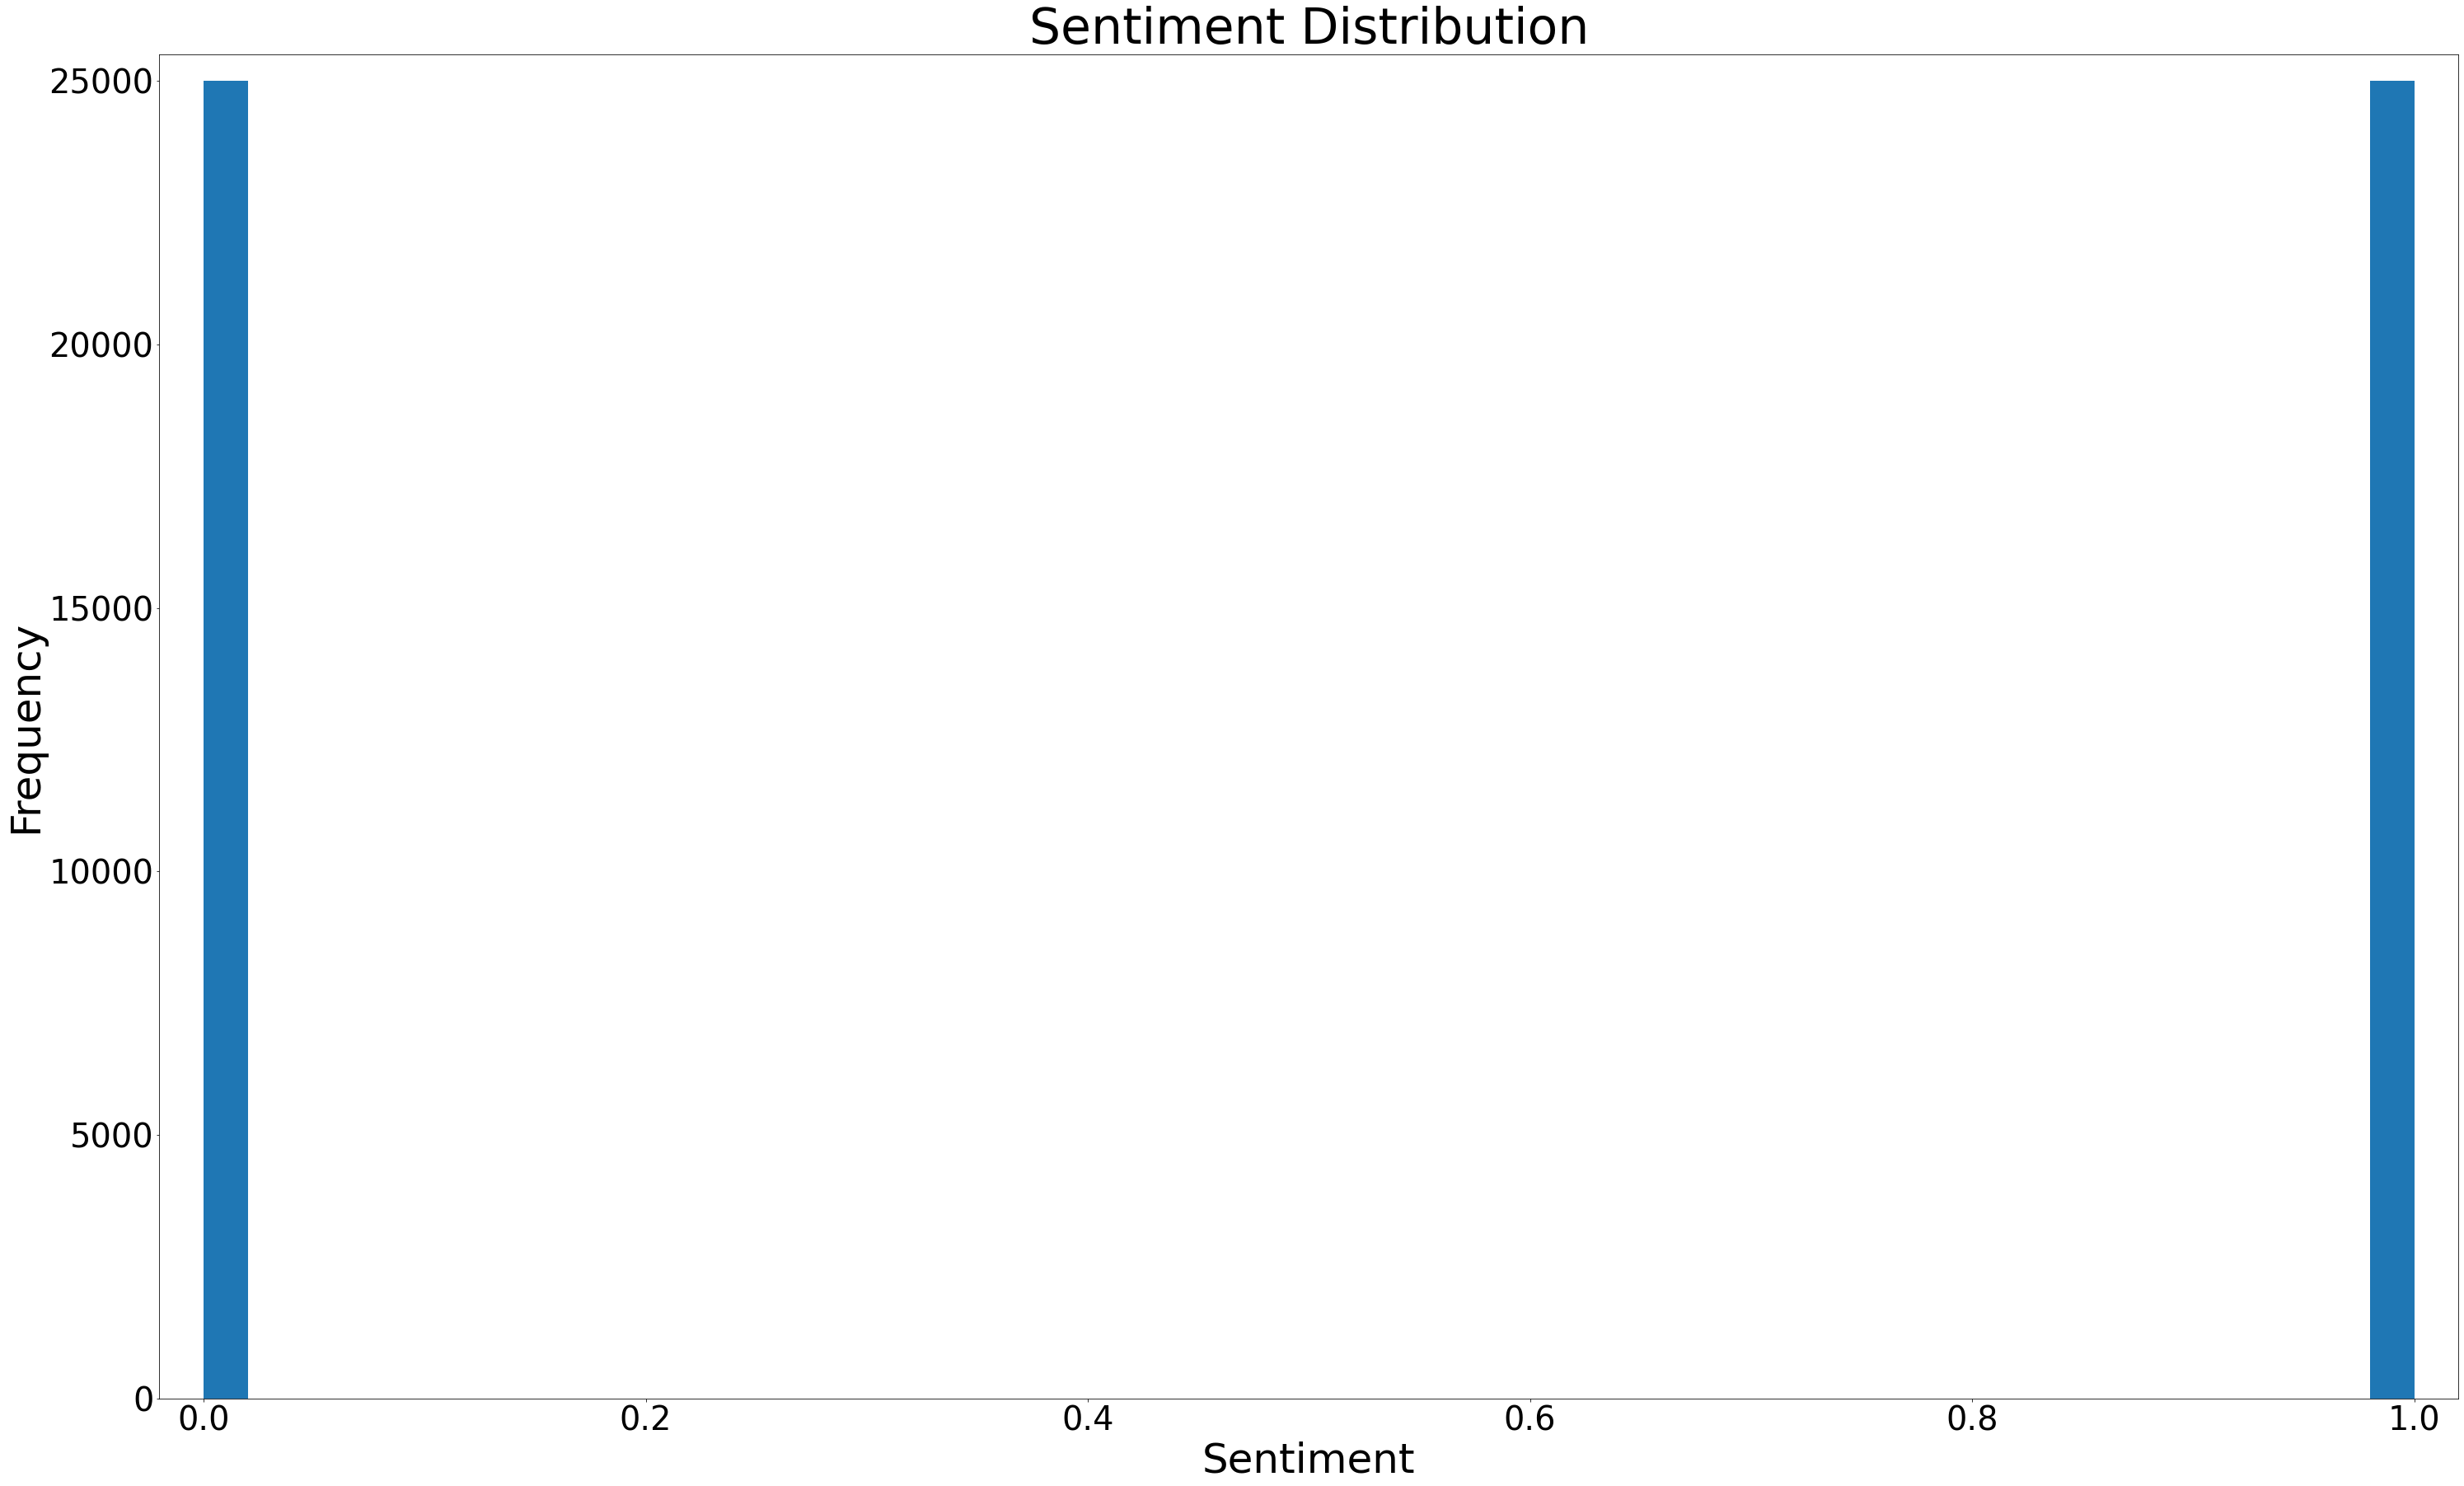

In [8]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(data['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

**Removing Stop words**


Removing the stop words using nltk.

In [9]:
nltk.download('stopwords')
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lenth distribution visualization**


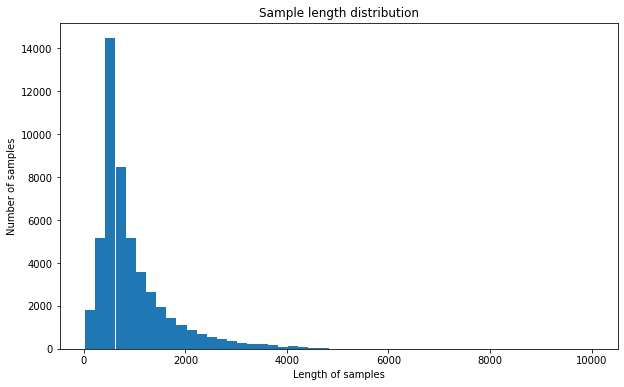

In [10]:
#Plot graph that will show length of review distribution
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

**Frequency of words Distribution**

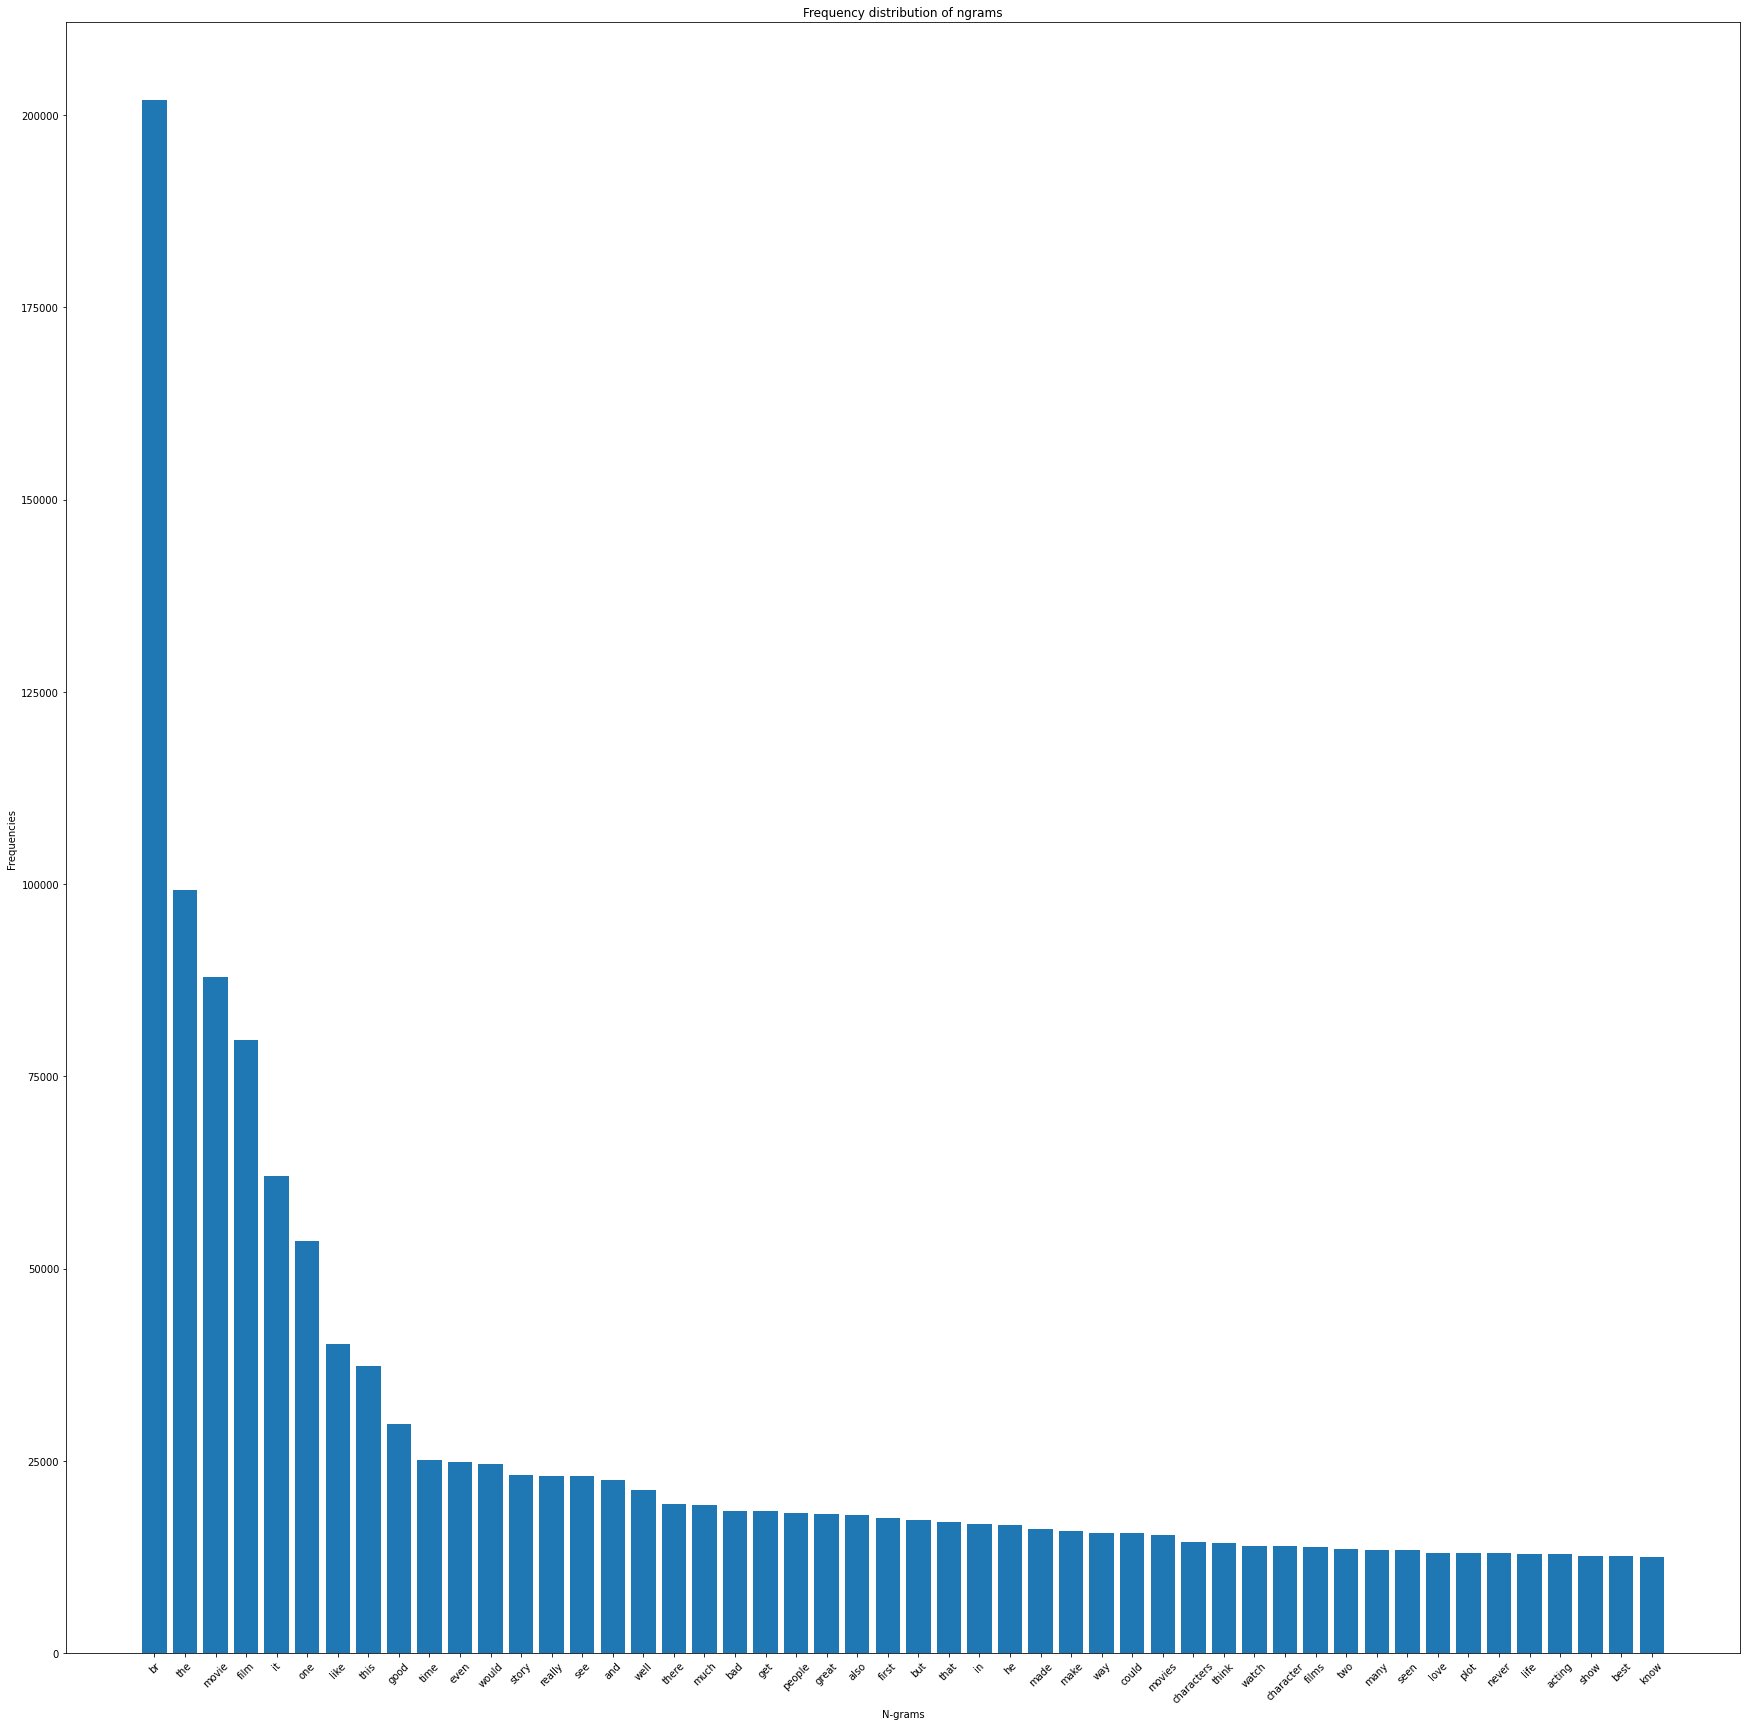

In [11]:
#plot graph that will show the frequency of words occuring


vectorizer = CountVectorizer()
# So, we get such structure:
#        | word1  | word2  |  word3 | word4
# text1  |   1    |    1   |   1    |   0
# text2  |   0    |    1   |   1    |   0
# text3  |   2    |    1   |   0    |   0
# text4  |   0    |    0   |   0    |   1
vect_texts = vectorizer.fit_transform(list(data['review']))
# ['word1', 'word2', 'word3', 'word4']
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

**Most common Words using Wordcloud**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [0]:
# Extracting 100 most common words
words=data['review']
words=words.astype(str)
mostcommon = FreqDist(words).most_common(100)

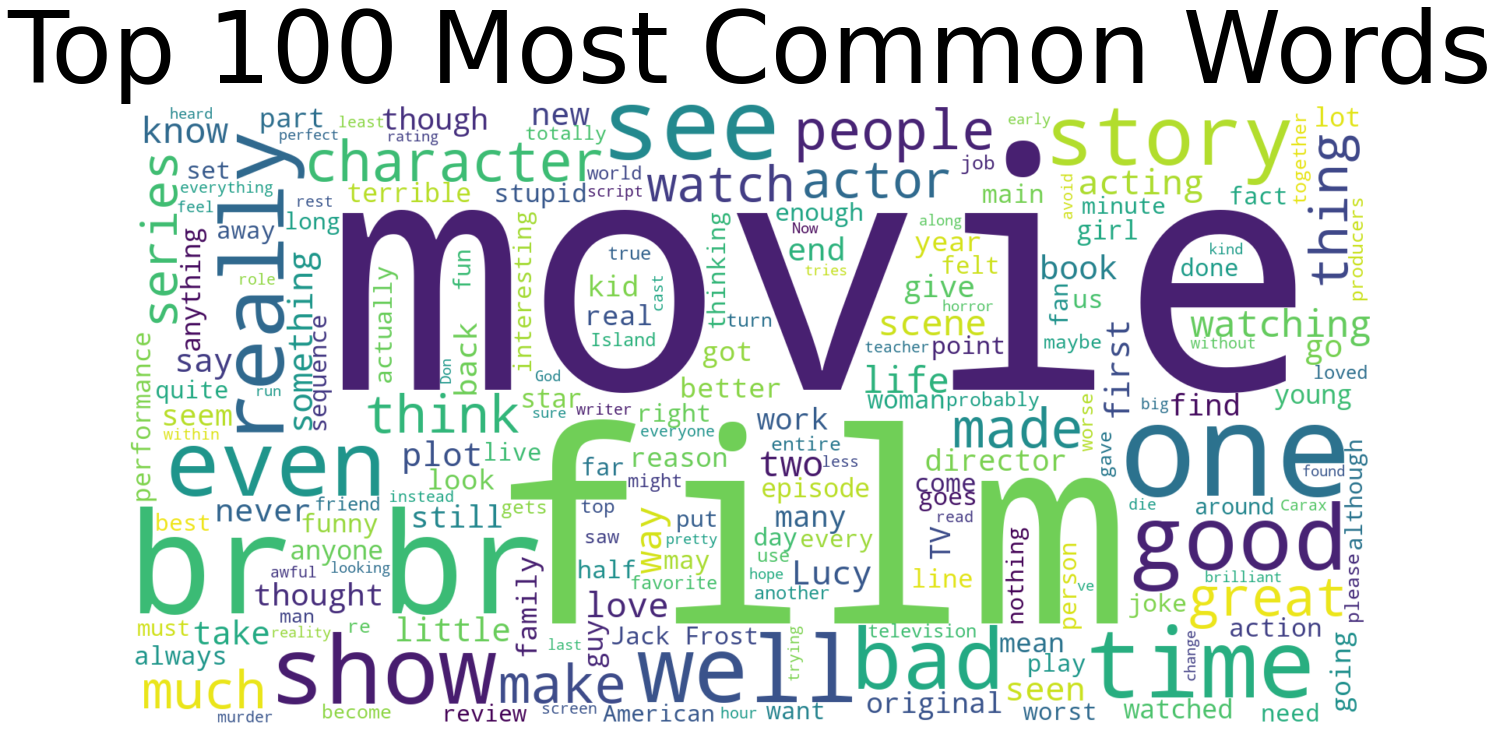

In [13]:
# Plotting most common words using wordcloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

**Frequency of word wrt sentiment**

Plotting most common word of specefic sentiment.

In [0]:
# Dividing review in two groups wrt sentiment value
group_by = data.groupby('sentiment')['review'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))


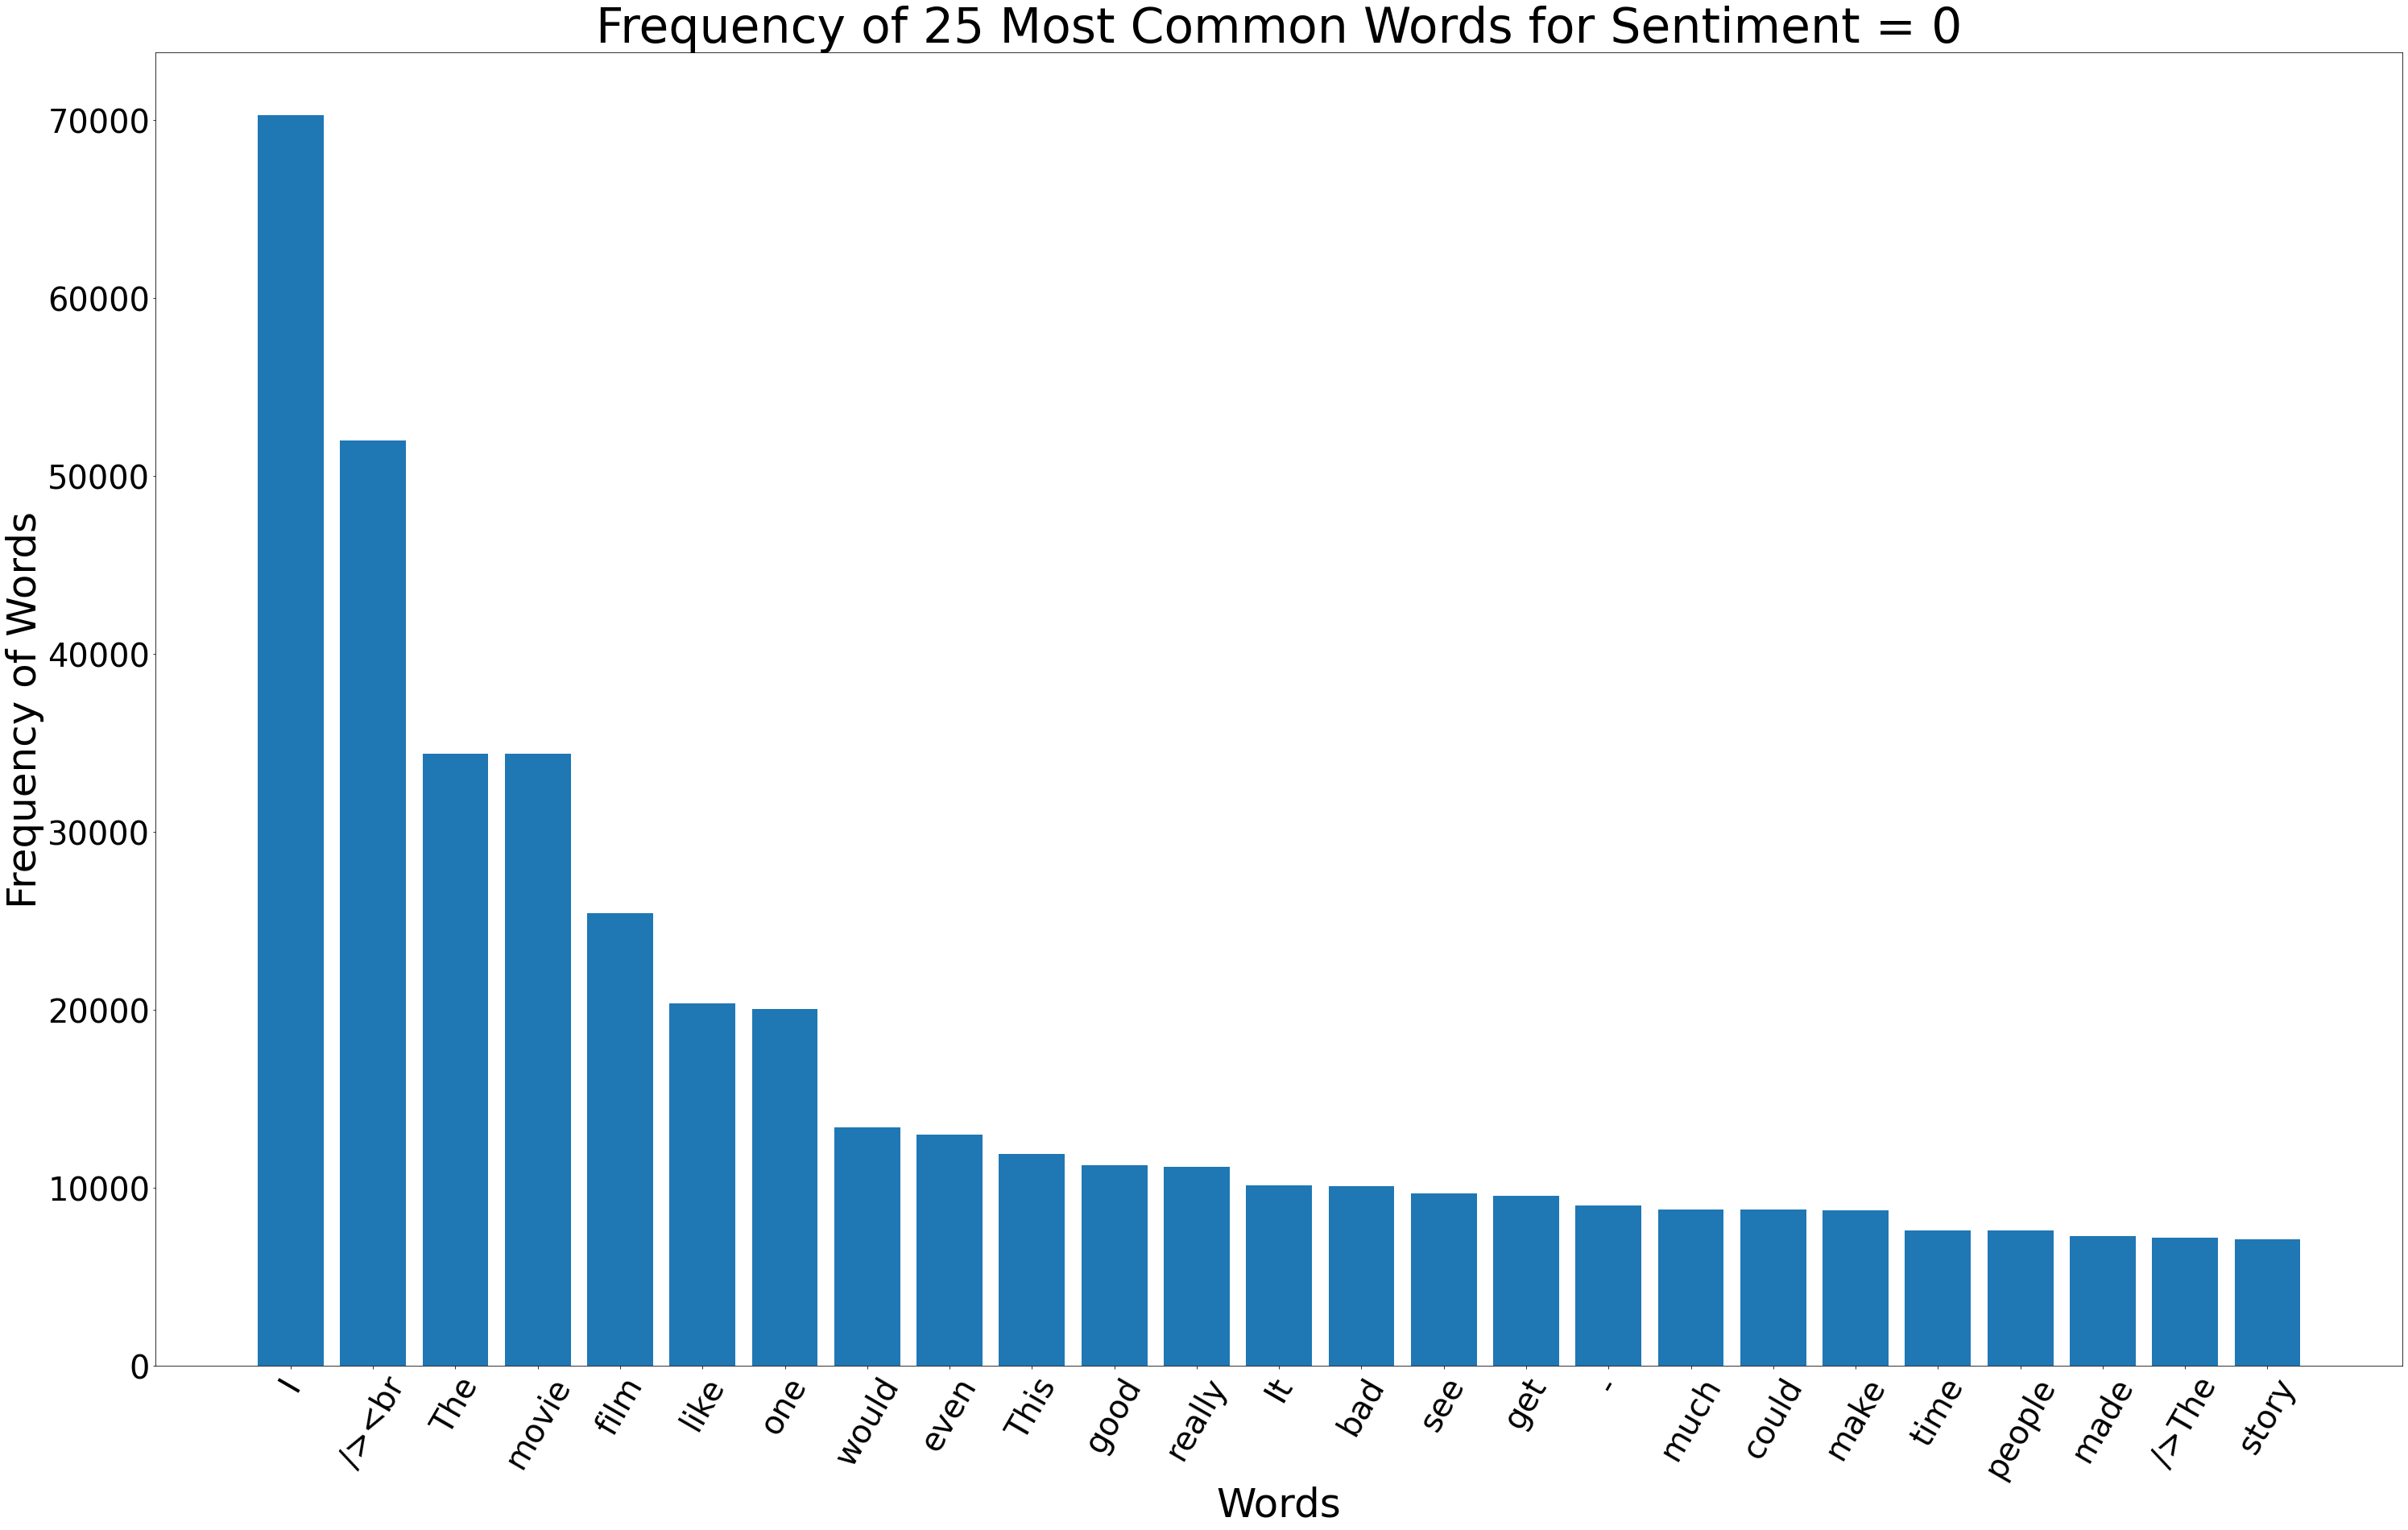

In [15]:
# Plotting 25 most common words for sentiment 0 
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]

plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Sentiment = 0', fontsize=60)
plt.show()

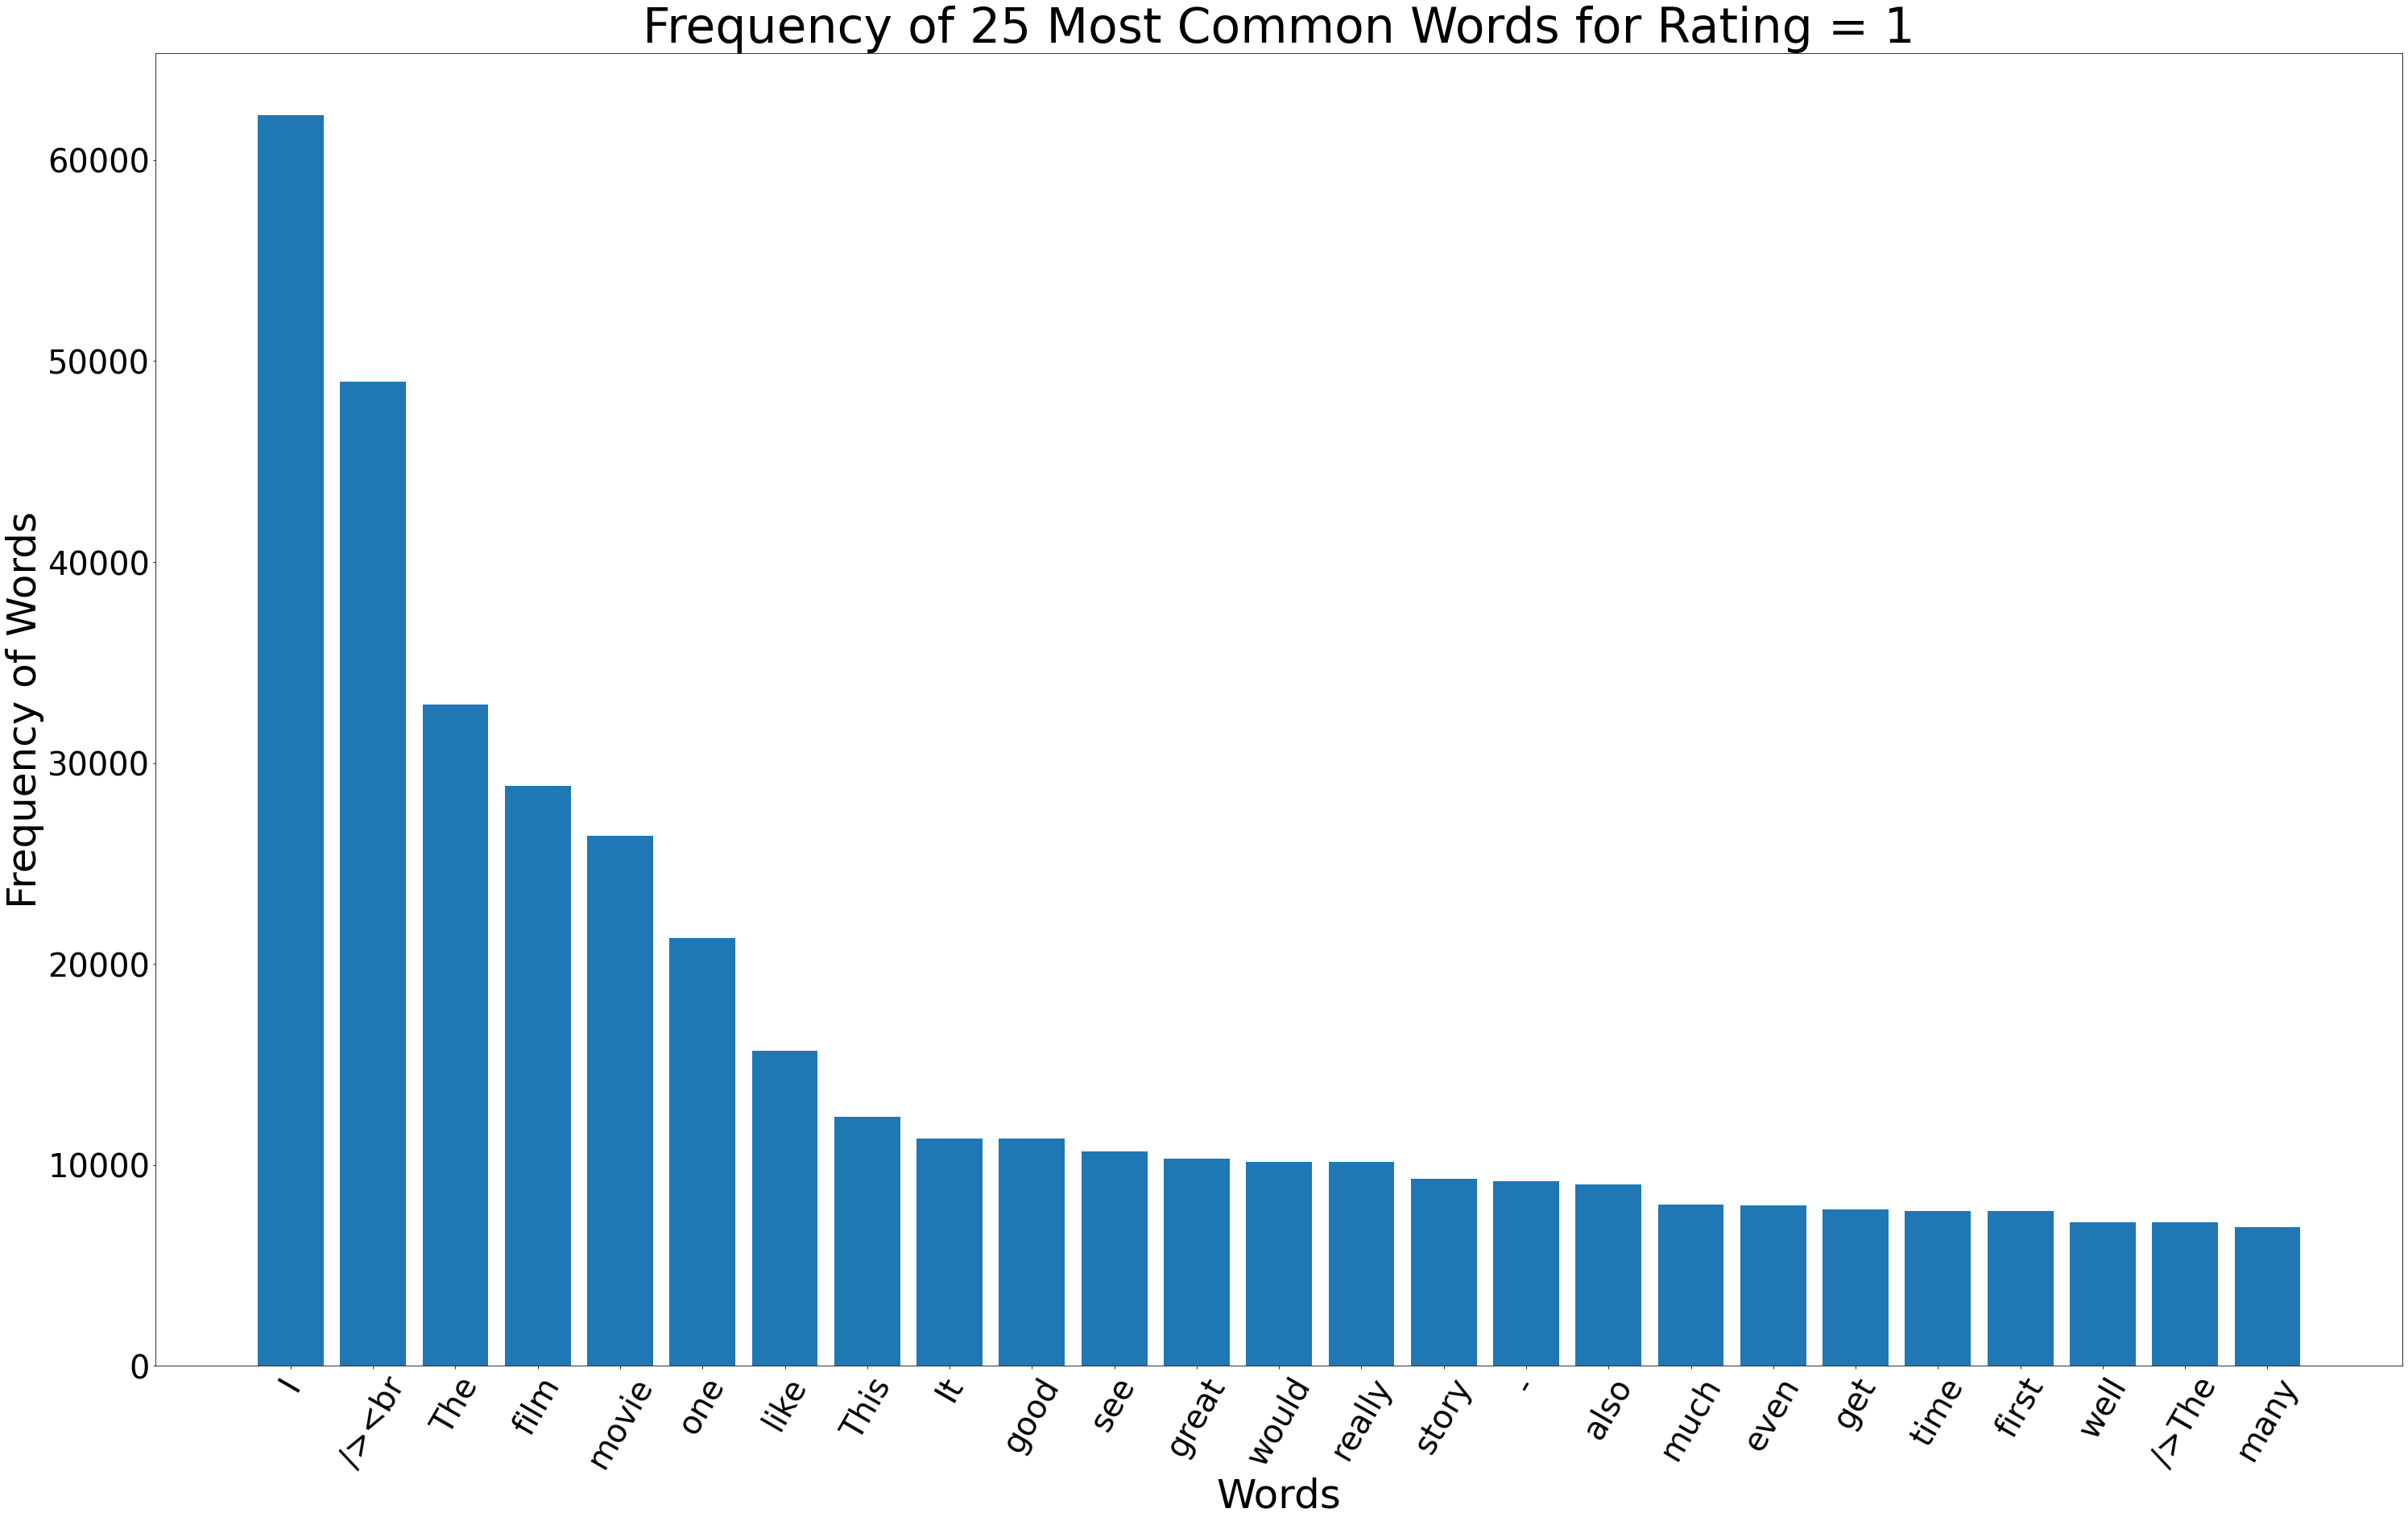

In [16]:
# Plotting 25 most common words for sentiment 1  

group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating = 1', fontsize=60)
plt.show()

## **Conclusions**

We have analyzed the text data with various graphs and plot it wrt words frequency.